# Sztuczne sieci neuronowe (*ang. Artificial Neural Network, ANN*)

In [ ]:
!pip install scikit-learn

In [ ]:
import sklearn

print(sklearn.__version__)

In [ ]:
import numpy as np

print(np.__version__)

## Algebra liniowa

https://www.youtube.com/watch?v=kjBOesZCoqc&list=PL0-GT3co4r2y2YErbmuJw2L5tW4Ew2O5B

### Mnożenie macierzowe (funkcja [`np.matmul`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html))

<center>
$ \small
\begin{pmatrix}
a_{1} & a_{2} & a_{3} \\
a_{4} & a_{5} & a_{6}
\end{pmatrix}\cdot\begin{pmatrix}
b_{1} & b_{4} \\
b_{2} & b_{5} \\
b_{3} & b_{6} \\
\end{pmatrix}= \begin{pmatrix}
a_{1}\cdot b_{1} + a_{2}\cdot b_{2} + a_{3}\cdot b_{3} & a_{1}\cdot b_{4} + a_{2}\cdot b_{5} + a_{3}\cdot b_{6}\\
a_{4}\cdot b_{1} + a_{5}\cdot b_{2} + a_{6}\cdot b_{3} & a_{4}\cdot b_{4} + a_{5}\cdot b_{5} + a_{6}\cdot b_{6}
\end{pmatrix}
$
</center>

In [ ]:
# mnożenie macierzowe

a = np.array(
    [
        [1, 2, 3],
        [4 ,5, 6]
    ]
)

b = np.array(
    [
        [1, 2],
        [3, 4],
        [5, 6]
    ]
)

# sposób I - funkcja np.matmul
c = np.matmul(a, b)  

# sposób II - operator @
c = a @ b

In [ ]:
print(c)

<center>
$ \small
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{pmatrix}\cdot\begin{pmatrix}
1 & 2 \\
3 & 4 \\
5 & 6 \\
\end{pmatrix}= \begin{pmatrix}
1\cdot 1 + 2\cdot 3 + 3\cdot 5 & 1\cdot 2 + 2\cdot 4 + 3\cdot 6\\
4\cdot 1 + 5\cdot 3 + 6\cdot 5 & 4\cdot 2 + 5\cdot 4 + 6\cdot 6
\end{pmatrix}= \begin{pmatrix}
22 & 28\\
49 & 64
\end{pmatrix}
$
</center>

#### Reguła mnożenia macierzy

<center>
$ (m, n) \cdot (n, p) = (m, p)$
</center>

In [ ]:
print(a.shape)

In [ ]:
print(b.shape)

In [ ]:
print(c.shape)

#### Zadanie 1

---

Dla zadanych macierzy

$ 
D =
\begin{pmatrix}
1 & 2 & 3 \\
\end{pmatrix}
$

$
E = \begin{pmatrix}
4 \\
5 \\
6 \\
\end{pmatrix}
$

$
K = \begin{pmatrix}
7 & 8 & 9 & 10 \\
11 & 12 & 13 & 14 \\
15 & 16 & 17 & 18 \\
\end{pmatrix}
$

znajdż macierze:

* $G = D \cdot E$
* $H = E \cdot D$
* $K = D \cdot F$

In [ ]:
# Rozwiązanie


Biblioteka numpy wyposażona jest w moduł zawierający wszystkie najważniejsze operacje wykorzystywane w algebrze liniowej [`np.linalg`](https://numpy.org/doc/stable/reference/routines.linalg.html#module-numpy.linalg).

### Macierz odwrotna (funkcja [`np.linalg.inv`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html#scipy.linalg.inv))

Macierz odwrotna do zadanej macierzy $L$ to taka macierz $L^{-1}$, że 

<br>
<center>$L \cdot L^{-1} = I$</center>

, gdzie $I$ to macierz identycznościowy.

In [ ]:
# Dla zadanej macierzy G
l = np.array(
    [
        [1., 2., -1.], 
        [2., 1., 2.],
        [-1., 2., 1.]
    ]
)

# macierz odwrotna ma postać
l_inv = np.linalg.inv(l)
l_inv

In [ ]:
identity = l @ l_inv  # błędy zaokrąglenia float
identity

Jak radzić sobie z niedokładnością arytemtyki zmiennoprzecinkowej ?

Funkcja [`np.around`](https://numpy.org/doc/stable/reference/generated/numpy.around.html#numpy.around) lub `np.round` z opcjonalnym parametrem decimals - liczbą miejsc po przecinku, do której zaokrąglamy.

In [ ]:
np.round(identity)  # bez parametry decimals zaokrągla do int

### Rozwiązywanie liniowych układów równań (funkcja [`np.linalg.solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html))

$$\begin{align*} 
\begin{cases}
2x_1 - 3x_2 &= 8 \\ 
-10x_1 + x_2 &= -12
\end{cases}
\end{align*}$$


<br>
$$
A=
  \begin{bmatrix}
    2 & -3 \\
    -10 & 1
  \end{bmatrix}$$
  
  
$$\vec x = \begin{bmatrix}
    x_1  \\
    x_2 
  \end{bmatrix}$$
  

$$b = \begin{bmatrix}
    8  \\
    -12 
  \end{bmatrix}$$
  
$$A \cdot \vec x = b = \begin{bmatrix}
    2 & -3 \\
    -10 & 1
  \end{bmatrix} \cdot  \begin{bmatrix}
    x_1  \\
    x_2 
  \end{bmatrix} =  \begin{bmatrix}
    8  \\
    -12 
  \end{bmatrix}$$
  
$$
A^{-1} \cdot A \cdot \vec x =  A^{-1} \cdot b 
$$
  
$$
\vec x = A^{-1}  \cdot b
$$

In [ ]:
a = np.array([[2, -3], [-10, 1]])
b = np.array([8, -12]).reshape(2, 1)

In [ ]:
a

In [ ]:
b

In [ ]:
np.linalg.solve(a, b)

#### Zadanie 2

---

Znajdź rozwiązanie układu równań

$$\begin{align*}
\begin{cases}
x_2 - x_1 &=  -3 \\ 
2x_1 + 2x_2 &=  10
\end{cases}
\end{align*}$$

In [1]:
# Rozwiązanie


Ogólną postać układu dwóch równań możemy sformułować w sposób:

$$\begin{align*} 
\begin{cases}
a_{11} \cdot x_1 + a_{12} \cdot x_2 + b_{1} &= y_{1} \\ 
a_{21} \cdot x_1 + a_{22} \cdot x_2 + b_{2} &= y_{2}
\end{cases}
\end{align*}$$


Rozwiązanie takiego układu oznacza znalezienie wartość x dla zadanych parametrów a, b oraz y.

### Istota metoda uczenia maszynowego

Przedmiotem uczenia maszynowego jest właśnie rozwiązywanie takich układów równań, tylko w trochę przeformułowanej postaci. Tym razem rozwiązaniem jest znalezienie parametrów a, b dla zadanych wartości x i y. Innymi słowy znalezienie takiego zestawu parametrów a, b, które w **najbardziej precyzyjny** sposób będą przeprowadzały wartości x w wartości y. Drugą różnicą jest to, że nie szukamy wartości, które idealnie spełniają układ równań, tylko dopuszczamy jakiś błąd dopasowania, który staramy się zminimalizować. 

Przeformułujmy trochę bardziej nasze równanie. Powiedzmy, że staramy się znaleźć parametry a, b dla zadanych wartości $x_{1}&, $x_{2}$, $y$ takich, że:
    
$$\begin{align*} 
a_{1} \cdot x_1 + a_{2} \cdot x_2 + b_{1} &= y 
\end{align*}$$

Zamieńmy parametry `a` na `w` i zacznijmy nazywać je wagami.

$$\begin{align*} 
w_{1} \cdot x_1 + w_{2} \cdot x_2 + b_{1} &= y 
\end{align*}$$

Chcemy znaleźć $w_1$, $w_2$, $b_1$ dla zadanych $x_1$, $x_2$, $y_1$. Możemy przedstawić takie zagadnienie w postaci graficznej.

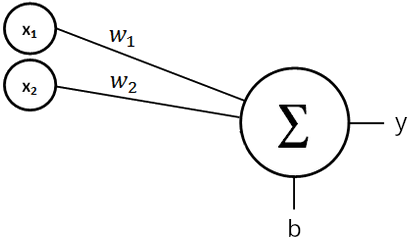

W ogólności $x-ów$ (czyli cech) może być więcej.

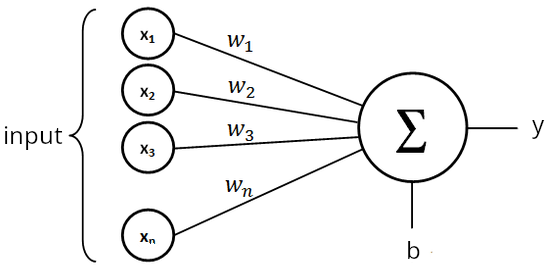

Co możemy zapisać w zwięzłej postaci za pomocą wzoru:

<center>
$
\Sigma^{i=0}_{n}w_{i} \cdot x_{i} + b = y
$
</center>

Pierwszym zadaniem takiego modelu była klasyfikacja binarna, dlatego wyjście modelu zostało przepuszczone przez funkcję schodkową.

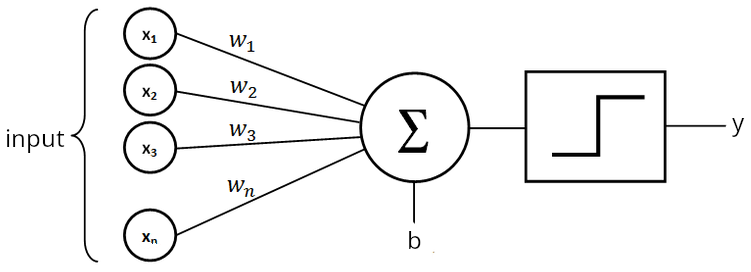<center>**Perceptron Rosenblatta**</center>

<center>
$
\Sigma^{i=0}_{n} \sigma ( w_{i} \cdot x_{i} + b )
$
</center>

Powyższa struktura została nazwana **Perceptronem Rosenblatta** na cześć jej pomysłodawcy Franka Rosenblatta, który koncepcję przedstawił w 1957 roku wykorzystując ją do klasyfikacji binarnej. Ludzie odnajdując w niej podobieństwo do sposobu w jaki w matematyce modeluje się działanie komórek układu nerwowego (neuronów) nazwali perceptron **sztucznym neuronem**, a funkcję, którą przykłada się do wyniku nazwano **funkcją aktywacji** (znów nawiązując do biologicznego neuronu). Początkowo funkcją aktywacji była funkcja schodkowa

$
step = \begin{align*} 
\begin{cases}
1 & if \;\;\; \Sigma^{n}_{i=0} w_{i} \cdot x_{i} + b = 0 \\
-1 & otherwise
\end{cases}
\end{align*}
$

Za pomocą takiego modelu można jednak reprezentować tylko liniowe zależności pomiędzy $x-ami$ a $y$. Przyłożenienie nieliniowej funkcja aktywacji okazała się świetnym sposobem na wprowadzenie nieliniowych zależności do modelu. Dzisiaj jako funkcji aktywacji używa się takich funkcji jak funkcja sigmoidalna, czy ReLU właśnie w celu zamodelowania nieliniowych zachowań.

Perceptron Rosenblatta można zapisać w zwięzłej postaci:

<center>
$
\Sigma^{i=0}_{n} \sigma ( w_{i} \cdot x_{i} + b )
$
</center>

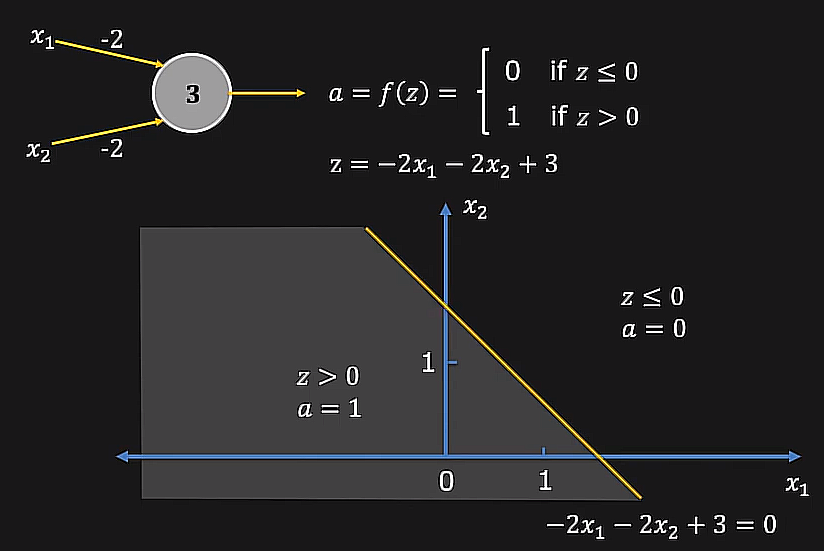 \; <center>Perceptron Rosenblatta jako klasyfikator liniowy</center>

**Ciekawostka**: Powyższa struktura nazywana jest najczęściej perceptronem mimo, że jej prawdziwa nazwa to **neuron McCullocha-Pittsa**. Perceptronem została nazwana maszyna stworzona przez Rosenblatta, a dzisiaj określa się nim zarówno pojedynczy neuron z dowolną funkcją aktywacji jak i wiele połączonych ze sobą neuronów.

## Wielowarstwowy perceptron (**ang Multilayer Perceptron, MLP**)

Mimo, że wprowadzenie nieliniowej funkcji aktywacji umożliwia modelowanie nieliniowych relacji, to okazało się, że poprzez złożenie kilku takich modeli, można znacznie lepiej odwzorować nieliniowości (za pomocą wielu małych modeli znacznie łatwiej jest odwzorować skomplikowane zależności, bo każdy model może odwzorowywać inny fragment tej nieliniowości).

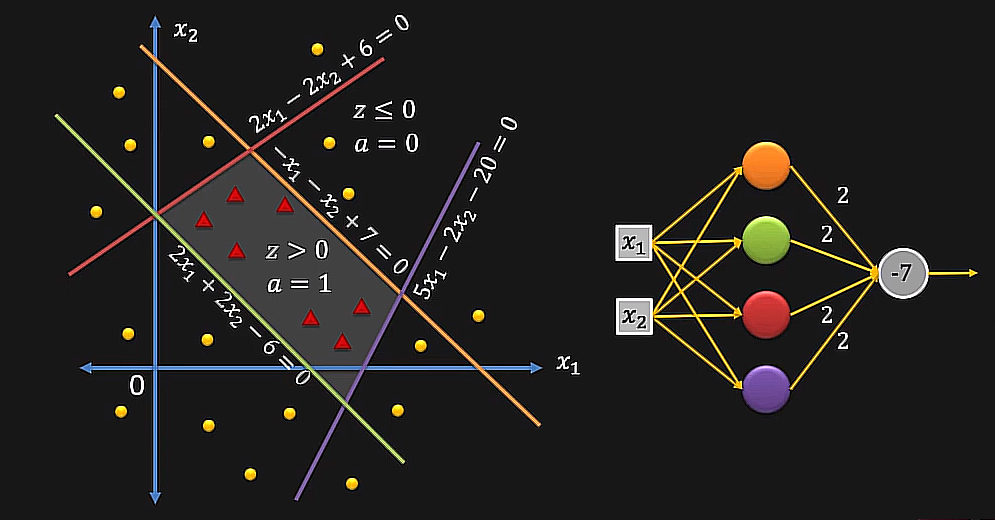

Złożenie takich kilku sztucznych neuronów nazywamy **sztuczną siecią neuronową**. Najprostszą architekturą sztucznej sieci neuronowej jest **wielowarstwowy perceptron**, czyli sieć złożona wyłącznie z perceptronów.

Zwiększanie liczby neuronów w sieci pozwala nam na coraz dokładniejsze odwzorowywanie nieliniowych zachowań, ale nie należy przesadzać, bo nasz model może zechcieć tak dokładnie odwzorować wszystkie nieliniowości, że zacznie dopasowywać się do szumu.

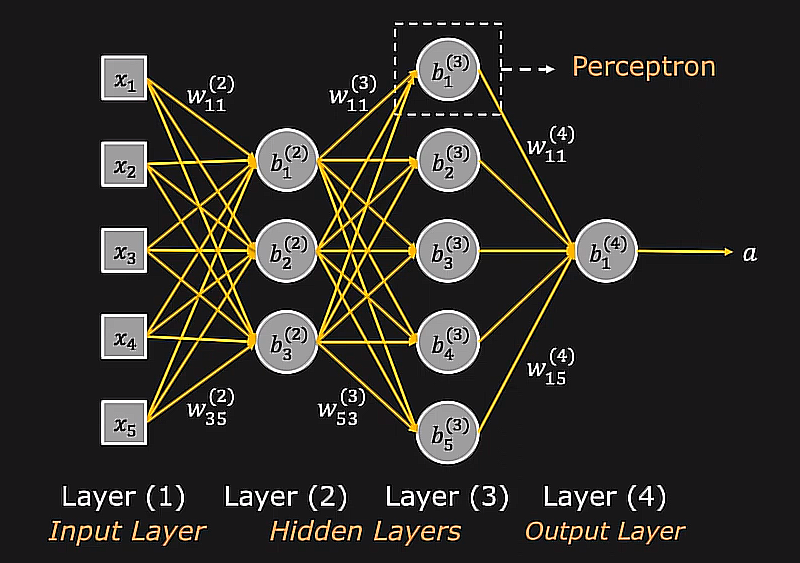
\;
<center>
Przykład wielowarstwowego perceptronu (złożonego z warstw w pełni połączonych, *ang. fully-connected layers*)
</center>

Perceptrony układają się w warstwy. Pierwszą warstwę (którą stanowią dane wejściowe) nazywamy warstwą wejściową (**ang. input layer**), ostatnią warstwę (która stanowi wynik działania modelu) nazywamy warstwą wyjściową (**ang. output layer**). Wszystkie warstwy pomiędzy nazywamy warstwami ukrytymi (**ang. hidden layer**).

Ze względu na mnogość różnych indeksów, w tym miejscu równania stają się na tyle skomplikowane, że rozkładanie je na czynniki pierwsze lepiej pozostawić wykładom matematycznym. Zainteresowanym polecam świetne materiały:

- [3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)
- [StatQuest](https://www.youtube.com/watch?v=zxagGtF9MeU&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1)

Ok, mamy podstawową struktrę sieci. Ale jak taka sieć się uczy ?

### Proces uczenia sieci neuronowej

Przyjmujemy jakieś początkowe wartości wag (przyp. wagi to zmienne naszego układu równań) i wyliczamy wynik. Porównujemy go z wynikiem oczekiwanym. Określamy błąd opisywany funkcją błędu (aka funkcją kosztu, funkcją celu). A następnie pamiętając, że wagi są zmiennymi w naszym modelu szukamy takich wartości tych zmiennych (wag), które dadzą minimalną wartość funkcji kosztu. Innymi słowy minimalizujemy funkcję kosztu względem wszystkich wag. Rachunek różniczkowy mówi, że żeby zoptymalizować jakąś funkcję względem jakiś zmiennych, należy policzyć pochodną tej funkcji (gradient w większej liczbie wymiarów) względem tych zmiennych i przyrównać ją do zera. W ten sposób możemy otrzymać tzw. **równania normalne**, które w sposób analityczny dostarczają nam wartości wag. Tylko, że tych wag mogą być tysiące, co czyni znalezienie **rozwiązania analitycznego** względem tych wszystkich wag zbyt złożonym obliczeniowo (może okazać się, że zabraknie atomów we wszechświecie na przechowanie wszystkich pośrednich obliczeń i czasu wszechświata na wykonanie wszystkich obliczeń).

Ale mamy jeszcze metody heurystyczne. Najpopularniejszą z nich jest **metoda spadku gradientowego**. Metoda spadku gradientowego wprowadzana jest jako podstawowe tzw. **rozwiązanie iteracyjne**.

Implementacja metody spadku gradientowego na sieciach neurnowych nazywana jest **mechanizmem propagacji wstecznej** (ang. backpropagation) i jej realizacja opiera się na regule łańcuchowej wprowadzanej zazwyczaj na podstawach rachunku różniczkowego (czyli wzór na pochodną funkcji złożonej). 

Istnieje wiele sposobów optymalizacji metody spadku gradientowego, wsród których podstawową jest tzw. **metoda stochastycznego spadku gradientowego** (ang. stochastic gradent descent, SGD).

Biblioteka sklearn posiada w swoim module [`sklearn.neural_network`](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) dwie implementacje modelu wielowarstwowego perceptronu [`sklearn.neural_network.MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) oraz [`sklearn.neural_network.MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

### Przykład

Zróbmy przykład, który jest typowym `hello world` w regresyjnych metodach uczenia maszynowego - ceny domów w Kaliforni (ale na mniej popularnym zbiorze danych).

#### Dane

Zaimportujmy i wczytajmy dane (użyjemy sklearn i pandas). Dane wczytamy z moduły [`sklearn.dataset`](https://python-course.eu/machine-learning/available-data-sets-in-sklearn.php)

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [ ]:
# wczytujemy dane
housing = fetch_california_housing()
housing

Więcej informacji o zbiorze danych możemy znaleźć [`tutaj`](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

In [ ]:
housing['data']

In [ ]:
housing['data'].shape

In [ ]:
housing['feature_names']

In [ ]:
# Wczytajmy wszystko do dataframe

X = pd.DataFrame(
    housing['data'],
    columns=housing['feature_names']
)
X

In [ ]:
y = housing['target']
y

#### Podzielmy zbiór danych na zbiór treningowy i testowy [`sklearn.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)  # domyślny rozmiar zbioru testowego 25%
# parametr random_state pozwala na kotrolowanie ziarna generatora liczb losowych

In [ ]:
#### Standaryzacja danych
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train), 
    columns=housing['feature_names']
)

#### Zdefiniujmy model (wielowarstwowy perceptron) [`sklearn.neural_network.MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(10)

# model = MLPRegressor(
#     hidden_layer_sizes = (16, 8, 4),
#     activation="relu",
#     random_state=23,
#     batch_size=64,
#     max_iter=1000,
# )  #  1 warstwa - 16 neuronów, 2 warstwa - 8 neuronów, 3 warstwa - 4 neurony
# # regularyzacja - max_iter vs early_stopping

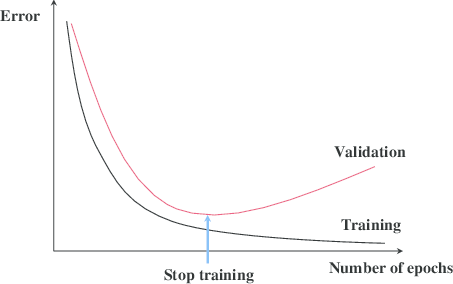

#### Uczenie modelu

In [ ]:
model.fit(X_train, y_train)

#### Popatrzmy na ten model

In [ ]:
dir(model)

In [ ]:
model.n_layers_

In [ ]:
model.n_features_in_

In [ ]:
model.n_outputs_

In [ ]:
model.hidden_layer_sizes

#### Walidacja modelu  

Metryki ewaluacji modelu można znaleźć w module [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [ ]:
y_pred = model.predict(X_test)

#### $r^2$

In [ ]:
from sklearn.metrics import r2_score

test_set_r2 = r2_score(y_test, y_pred)
test_set_r2

#### $mse$

In [ ]:
from sklearn.metrics import mean_squared_error

test_set_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_set_rmse

### Zadanie 3

W analogiczny sposób wykorzystaj wielowarstwowy perceptron do klasyfikacji danych pochodzących z funkcji [`sklearn.datasets.load_wine`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). Po otrzymaniu pierwszych statystyk zrób lekki tunning modelu, tzn. przetestuj wartości kilku hiperparametrów (architektura sieci, funkcja aktywacji, early_stopping)

#### Dane

Zaimportuj i wczytaj dane (użyj sklearn i pandas). Dane wczytaj z moduły [`sklearn.dataset`](https://python-course.eu/machine-learning/available-data-sets-in-sklearn.php)

In [ ]:
from sklearn.datasets import ___

In [ ]:
# wczytujemy dane
wine = ___()

In [ ]:
# Wczytajmy wszystko do dataframe

X = pd.DataFrame(
    wine[___],
    columns=wine['feature_names']
)
X

In [ ]:
y = wine[___]
y

#### Podziel zbiór danych na zbiór treningowy i testowy [`sklearn.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(___, ___, random_state=23)  # domyślny rozmiar zbioru testowego 25%
# parametr random_state pozwala na kotrolowanie ziarna generatora liczb losowych

#### Ustandaryzuj dane

In [ ]:
#### Standaryzacja danych
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(___), 
    columns=wine['feature_names']
)

#### Zdefiniuj model (wielowarstwowy perceptron) [`sklearn.neural_network.MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
from sklearn.neural_network import ___

model = ___(
    hidden_layer_sizes = (16, 8, 4),
    activation="relu",
    random_state=23,
    batch_size=64,
    max_iter=1000,
)  #  1 warstwa - 16 neuronów, 2 warstwa - 8 neuronów, 3 warstwa - 4 neurony
# regularyzacja - max_iter vs early_stopping

#### Uczenie modelu

In [ ]:
model.fit(___, ___)

#### Walidacja modelu  

Metryki ewaluacji modelu można znaleźć w module [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [ ]:
y_pred = model.predict(___)

#### classification_report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, ___)
print(report)  # support = liczba obserwacji które należą do danej klasy